In [1]:
import numpy as np
import pandas as pd

In [2]:
istat_file = 'data/redditi_comune_2017.csv'
columns = [2, 3, 4, 5, 7, 10, 11, 12, 13]
names = ['id', 'comune', 'provincia', 'regione', 'contribuenti',
        'dipendenti', 'r_dipendenti', 'pensioni', 'r_pensioni']
istat = pd.read_csv(istat_file, sep=';', index_col=0, header=0, usecols=columns, names=names)

In [3]:
istat.head()

,comune,provincia,regione,contribuenti,dipendenti,r_dipendenti,pensioni,r_pensioni
id,,,,,,,,
28001,ABANO TERME,PD,Veneto,14629,7557,173177492,5277,102551417
98001,ABBADIA CERRETO,LO,Lombardia,200,100,1981369,75,1167900
97001,ABBADIA LARIANA,LC,Lombardia,2436,1314,31444446,856,16477462
52001,ABBADIA SAN SALVATORE,SI,Toscana,4914,2343,40264843,1989,30308363
95001,ABBASANTA,OR,Sardegna,1733,801,15306818,653,10976913


## Data enrichment

In [4]:
com_file = 'data/comuni.txt'
columns = [2, 3, 4, 5, 6, 7, 8, 9, 12, 14]
names = ['id', 'lat_g', 'lat_m', 'lat_s', 'lon_g',
        'lon_m', 'lon_s', 'altitudine', 'superficie', 'nome']
comuni = pd.read_csv(com_file, sep=',', index_col=0, header=0, usecols=columns, names=names)
comuni['lat'] = comuni.lat_g + comuni.lat_m / 60 + comuni.lat_s / 3600
comuni['lon'] = comuni.lon_g + comuni.lon_m / 60 + comuni.lon_s / 3600
comuni['ncap'] = [x.upper() for x in comuni.nome]

In [5]:
comuni.head()

,lat_g,lat_m,lat_s,lon_g,lon_m,lon_s,altitudine,superficie,nome,lat,lon,ncap
id,,,,,,,,,,,,
2,44,55,3,7,29,28,257,1570,Airasca,44.917500,7.491111,AIRASCA
3,45,18,58,7,18,10,1080,4609,Ala di Stura,45.316111,7.302778,ALA DI STURA
4,45,26,6,7,56,50,230,1173,Albiano d'Ivrea,45.435000,7.947222,ALBIANO D'IVREA
5,45,27,44,7,46,40,610,695,Alice Superiore,45.462222,7.777778,ALICE SUPERIORE
6,45,7,12,7,23,53,364,1791,Almese,45.120000,7.398056,ALMESE


In [6]:
comuni[comuni.nome=='Milano']

,lat_g,lat_m,lat_s,lon_g,lon_m,lon_s,altitudine,superficie,nome,lat,lon,ncap
id,,,,,,,,,,,,
146,45,27,57,9,11,24,122,18174,Milano,45.465833,9.19,MILANO


In [7]:
istat[istat.comune=='MILANO']

,comune,provincia,regione,contribuenti,dipendenti,r_dipendenti,pensioni,r_pensioni
id,,,,,,,,
15146,MILANO,MI,Lombardia,1003112,548196,17624955573,317803,7406140347


## Prepare to join

In [8]:
matches = []
for i, row in comuni.iterrows():
    match = np.nan
    for j, record in istat[istat.comune==row.ncap].iterrows():
        k = str(i)
        if k == str(j)[-len(k)]:
            match = j
            break
    matches.append(match)

In [9]:
comuni['istat'] = matches

In [10]:
I = comuni.join(istat, on='istat')

In [11]:
I.head()

,lat_g,lat_m,lat_s,lon_g,lon_m,lon_s,altitudine,superficie,nome,lat,...,ncap,istat,comune,provincia,regione,contribuenti,dipendenti,r_dipendenti,pensioni,r_pensioni
id,,,,,,,,,,,,,,,,,,,,,
2,44,55,3,7,29,28,257,1570,Airasca,44.917500,...,AIRASCA,1002.0,AIRASCA,TO,Piemonte,2580.0,1440.0,29820922.0,875.0,16186230.0
3,45,18,58,7,18,10,1080,4609,Ala di Stura,45.316111,...,ALA DI STURA,1003.0,ALA DI STURA,TO,Piemonte,351.0,152.0,2688920.0,132.0,2067215.0
4,45,26,6,7,56,50,230,1173,Albiano d'Ivrea,45.435000,...,ALBIANO D'IVREA,1004.0,ALBIANO D'IVREA,TO,Piemonte,1257.0,599.0,13360458.0,528.0,9266221.0
5,45,27,44,7,46,40,610,695,Alice Superiore,45.462222,...,ALICE SUPERIORE,1005.0,ALICE SUPERIORE,TO,Piemonte,524.0,228.0,4606423.0,230.0,4384334.0
6,45,7,12,7,23,53,364,1791,Almese,45.120000,...,ALMESE,1006.0,ALMESE,TO,Piemonte,4761.0,2341.0,61886342.0,1697.0,33508047.0


In [12]:
import matplotlib.pyplot as plt

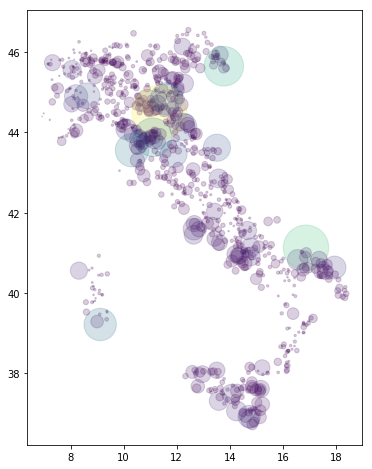

In [18]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.scatter(I.lon, I.lat, alpha=0.2, 
           s=I.contribuenti / 100, c=I.pensioni)
plt.show()